In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement import temperature
from kid_readout.measurement.io import nc

In [3]:
ncf = nc.NCFile('/data/readout/2016-07-26_214217_Tc.nc')

In [4]:
ncf.node_names()

[u'SweepArray0', u'SweepArray1', u'SweepArray2', u'SweepArray3']

In [5]:
sas = [ncf.read(name) for name in ncf.node_names()]

In [6]:
for sa in sas:
    for stream in sa.stream_arrays:
        temperature.add_temperature(stream, cryostat='starcryo')

updated file list


In [7]:
colors = ['b', 'g', 'r', 'k']

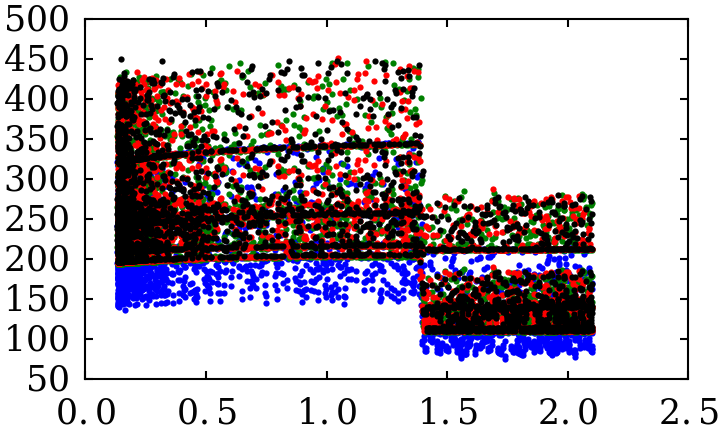

In [8]:
fig, ax = plt.subplots()
for sa, color in zip(sas, colors):
    for stream in sa.stream_arrays:
        ax.plot(stream.tone_bin.size * [stream.state.temperature.primary_package],
                np.abs(stream.s21_point),
               '.', color=color)

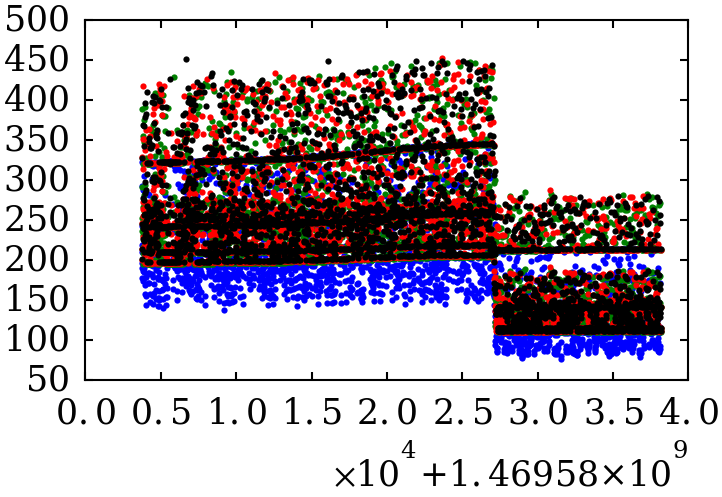

In [9]:
fig, ax = plt.subplots()
for sa, color in zip(sas, colors):
    for stream in sa.stream_arrays:
        ax.plot(stream.tone_bin.size * [stream.epoch],
                np.abs(stream.s21_point),
               '.', color=color)

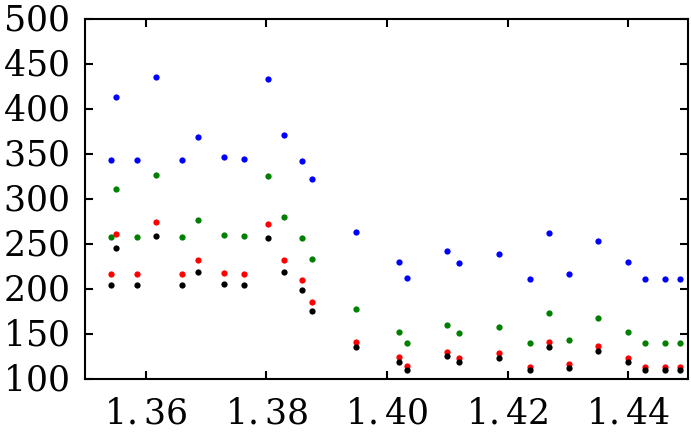

In [17]:
atten_index = 2

fig, ax = plt.subplots()
ax.set_xlim(1.35, 1.45)

for n, color in enumerate(colors):
    for stream in sas[atten_index].stream_arrays:
        ax.plot(stream.state.temperature.primary_package,
                np.abs(stream.s21_point[n]),
               '.', color=color)